# Load Dataset


In [ ]:
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 378kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [ ]:
!ls  /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1

WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
file_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Pre-processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(file_path)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# check null values
tmp =  df.isnull().sum()
print(tmp[tmp > 0])

Series([], dtype: int64)


In [ ]:
#  0   customerID        7043 non-null   object # drop
#  1   gender            7043 non-null   object # binary
#  2   SeniorCitizen     7043 non-null   int64                               #numerical
#  3   Partner           7043 non-null   object # binary
#  4   Dependents        7043 non-null   object # binary
#  5   tenure            7043 non-null   int64                               #numerical
#  6   PhoneService      7043 non-null   object # binary
#  7   MultipleLines     7043 non-null   object # binary
#  8   InternetService   7043 non-null   object           #one_hot_encodes
#  9   OnlineSecurity    7043 non-null   object # binary
#  10  OnlineBackup      7043 non-null   object # binary
#  11  DeviceProtection  7043 non-null   object # binary
#  12  TechSupport       7043 non-null   object # binary
#  13  StreamingTV       7043 non-null   object # binary
#  14  StreamingMovies   7043 non-null   object # binary
#  15  Contract          7043 non-null   object           #one_hot_encodes
#  16  PaperlessBilling  7043 non-null   object # binary
#  17  PaymentMethod     7043 non-null   object           #one_hot_encodes
#  18  MonthlyCharges    7043 non-null   float64
#  19  TotalCharges      7043 non-null   object                             #numerical
#  20  Churn             7043 non-null   object # binary

In [ ]:
# drop customer id
df.drop(['customerID'], axis=1, inplace=True)

In [ ]:
# check type of columns
text_columns = []
numeric_columns = []

for col in df.columns:
  if df[col].dtype == 'object':
    text_columns.append(col)
  else:
    numeric_columns.append(col)

print("Text Columns:", text_columns)
print("Numeric Columns:", numeric_columns) # -> Change Total Charges to numeric column

Text Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [ ]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [ ]:
binary_cols = ['MultipleLines',
               'OnlineSecurity',
               'OnlineBackup',
               'DeviceProtection',
               'TechSupport',
               'StreamingTV',
               'StreamingMovies',
               'Partner',
               'Dependents',
               'PhoneService',
               'PaperlessBilling',
               'Churn']

In [ ]:
# binary
for binary_col in binary_cols:
  print(f'before : {df[binary_col].value_counts()}')
  df[binary_col] = df[binary_col].apply(lambda x: 1 if x == 'Yes' else 0)
  print(f'after : {df[binary_col].value_counts()}', end='\n\n')

before : MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
after : MultipleLines
0    4072
1    2971
Name: count, dtype: int64

before : OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
after : OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64

before : OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
after : OnlineBackup
0    4614
1    2429
Name: count, dtype: int64

before : DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
after : DeviceProtection
0    4621
1    2422
Name: count, dtype: int64

before : TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
after : TechSupport
0    4999
1    2044
Name: count, dtype: int6

In [ ]:
one_hot_encodes = ['InternetService', 'Contract', 'PaymentMethod']

In [ ]:
for one_hot_encode in one_hot_encodes:
  print(df[one_hot_encode].value_counts(), end='\n\n')

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64



In [ ]:
# df = pd.get_dummies(df, columns=['InternetService'], drop_first=True)  # Drop 'No' as reference category
# df = pd.get_dummies(df, columns=['Contract'], drop_first=True)  # Drop 'Month-to-month' as reference category
# df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True)  # Drop 'Bank transfer (automatic)' as reference category

In [ ]:
# One-Hot Encoding
for one_hot_encode in one_hot_encodes:
  one_hot_encoded_df = pd.get_dummies(df[one_hot_encode], dtype=int, prefix=one_hot_encode)
  df = pd.concat([df, one_hot_encoded_df], axis=1)
df.drop(one_hot_encodes, axis=1, inplace=True)

In [ ]:
df = df[df['TotalCharges'] != ' '].copy()

# Convert 'TotalCharges' to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
# check missing value
tmp =  df.isnull().sum()
print(tmp[tmp > 0])

Series([], dtype: int64)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
y.value_counts()

,count
Churn,
0,5163
1,1869


# Processing (Xgboost)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
import xgboost as xgb
import time

from collections import Counter

# Under sampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

## Data Imbalance

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Effects of Data Resampling on Predicting Customer Churn via a Comparative Tree-based Random Forest and XGBoost
start = time.time()
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search.fit(X_train, y_train)
end = time.time()
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy_xgboost_imbalance_before = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy_xgboost_imbalance_before}")
time_xgboost_imbalance_before = end - start
print(f'Time : {time_xgboost_imbalance_before}')

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters: {'learning_rate': 0.75, 'max_depth': 1, 'n_estimators': 50}
Best cross-validation accuracy: 0.8071111111111111
Test set accuracy: 0.7924662402274343
Time : 122.61468982696533


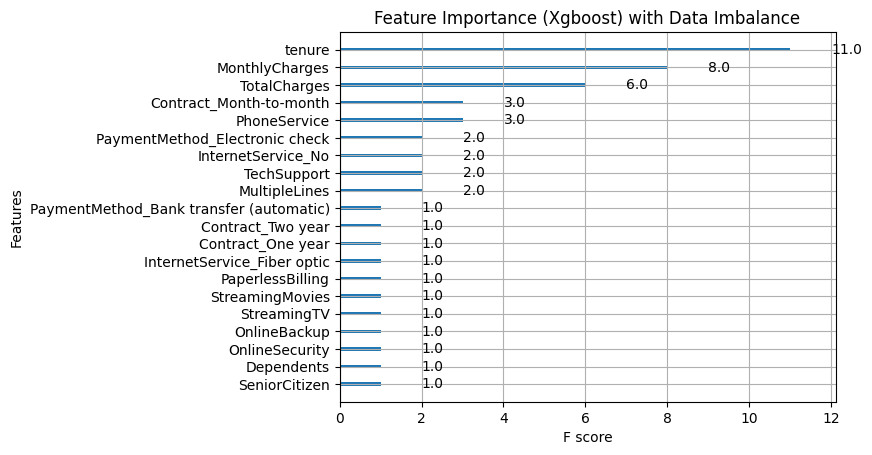

In [ ]:
# Feature Importance Plot
xgb.plot_importance(best_model, importance_type="weight")  # 'weight', 'gain', or 'cover'
plt.title("Feature Importance (Xgboost) with Data Imbalance")
plt.show()

In [ ]:
X_imbalance_fea = X[['MonthlyCharges', 'tenure', 'TotalCharges']]
y_imbalance_fea = y
X_train, X_test, y_train, y_test = train_test_split(X_imbalance_fea, y_imbalance_fea, test_size=0.2, random_state=42)

In [ ]:
# fearure importance
start = time.time()
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search.fit(X_train, y_train)
end = time.time()

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy_xgboost_imbalance_after = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy_xgboost_imbalance_after}")
time_xgboost_imbalance_after = end - start
print(f'Time : {time_xgboost_imbalance_after}')

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.7952
Test set accuracy: 0.7874911158493249
Time : 71.44706463813782


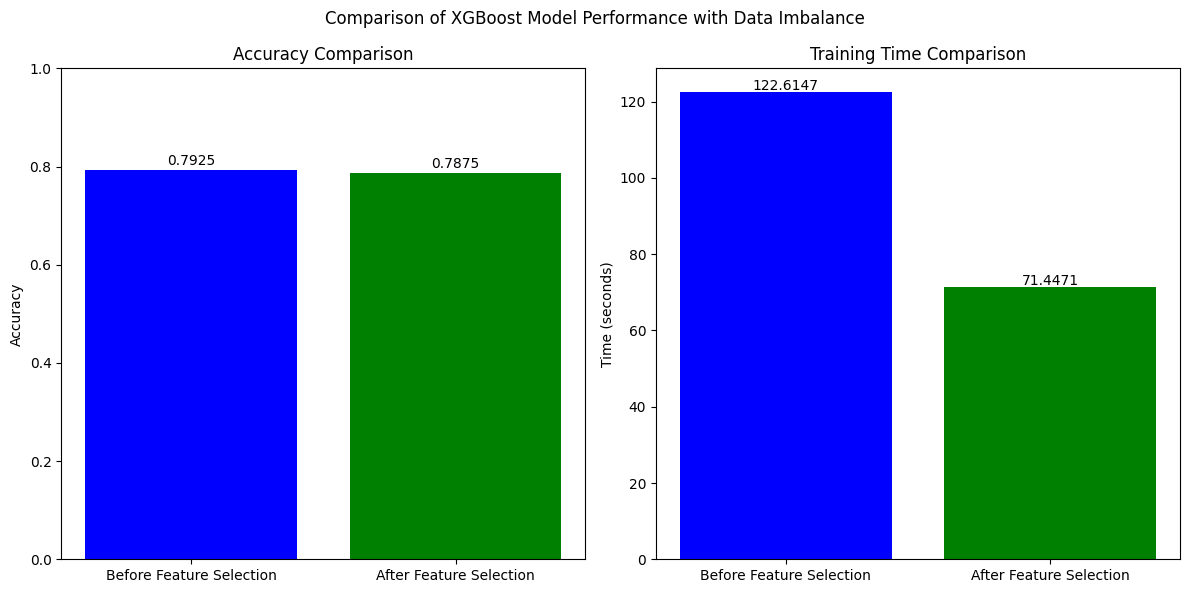

In [ ]:
# Step 6: Visualize the comparison in a bar chart
labels = ['Before Feature Selection', 'After Feature Selection']
accuracy_values = [accuracy_xgboost_imbalance_before, accuracy_xgboost_imbalance_after]
time_values = [time_xgboost_imbalance_before, time_xgboost_imbalance_after]

# Create a subplot to compare time and accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of XGBoost Model Performance with Data Imbalance')

# Accuracy comparison
ax[0].bar(labels, accuracy_values, color=['blue', 'green'])
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

for index, data in enumerate(accuracy_values):
    ax[0].text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Time comparison
ax[1].bar(labels, time_values, color=['blue', 'green'])
ax[1].set_title('Training Time Comparison')
ax[1].set_ylabel('Time (seconds)')

for index, data in enumerate(time_values):
    ax[1].text(x=index, y=data + 0.5, s=f"{data:.4f}", ha='center')

plt.tight_layout()
plt.show()

## SMOTE

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
print(f"Class distribution before SMOTE: {Counter(y)}")
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = smote.fit_resample(X_train, y_train)

# Show the distribution of classes after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_SMOTE)}")

Class distribution before SMOTE: Counter({0: 5163, 1: 1869})
Class distribution after SMOTE: Counter({1: 4130, 0: 4130})


In [ ]:
start = time.time()
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search.fit(X_SMOTE, y_SMOTE)
end = time.time()
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy_xgboost_smote_before = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy_xgboost_smote_before}")

time_xgboost_smote_before = end - start
print(f'Time : {time_xgboost_smote_before}')

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
Best cross-validation accuracy: 0.8429782082324454
Test set accuracy: 0.7633262260127932
Time : 148.1727910041809


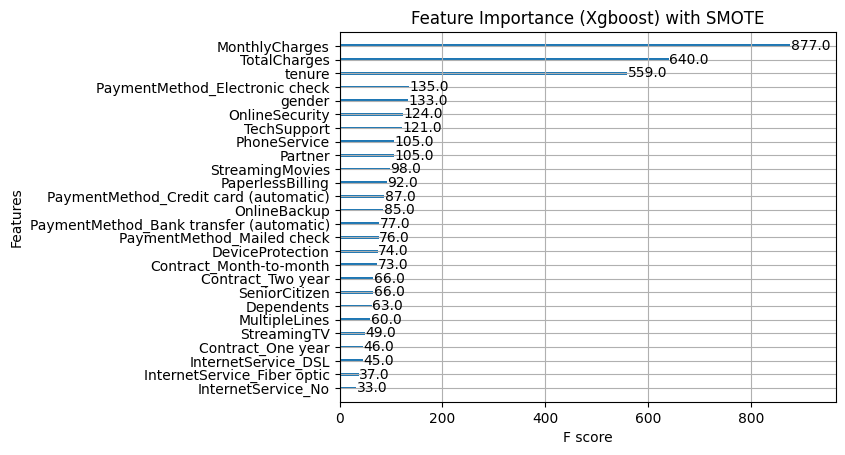

In [ ]:
# Feature Importance Plot
xgb.plot_importance(best_model, importance_type="weight")  # 'weight', 'gain', or 'cover'
plt.title("Feature Importance (Xgboost) with SMOTE")
plt.show()

In [ ]:
# Assuming you already have X and y loaded, and you have selected the features for under-sampling
X_smote_fea = X[['MonthlyCharges', 'tenure', 'TotalCharges']]  # Features for smote
y_smote_fea = y  # Target variable

# Show class distribution before smote
print(f"Class distribution before smote : {Counter(y_smote_fea)}")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_fea, y_smote_fea, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Show class distribution after smote-sampling
print(f"Class distribution after smote sampling: {Counter(y_train_SMOTE)}")

Class distribution before smote : Counter({0: 5163, 1: 1869})
Class distribution after smote sampling: Counter({1: 4130, 0: 4130})


In [ ]:
# Initialize the XGBoost classifier
start = time.time()
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search.fit(X_train_SMOTE, y_train_SMOTE)
end = time.time()
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
# Evaluate the model
accuracy_xgboost_smote_after = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy_xgboost_smote_after}")

time_xgboost_smote_after = end - start
print(f'Time : {time_xgboost_smote_after}')

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
Best cross-validation accuracy: 0.7737288135593221
Test set accuracy: 0.7093105899076049
Time : 85.35653924942017


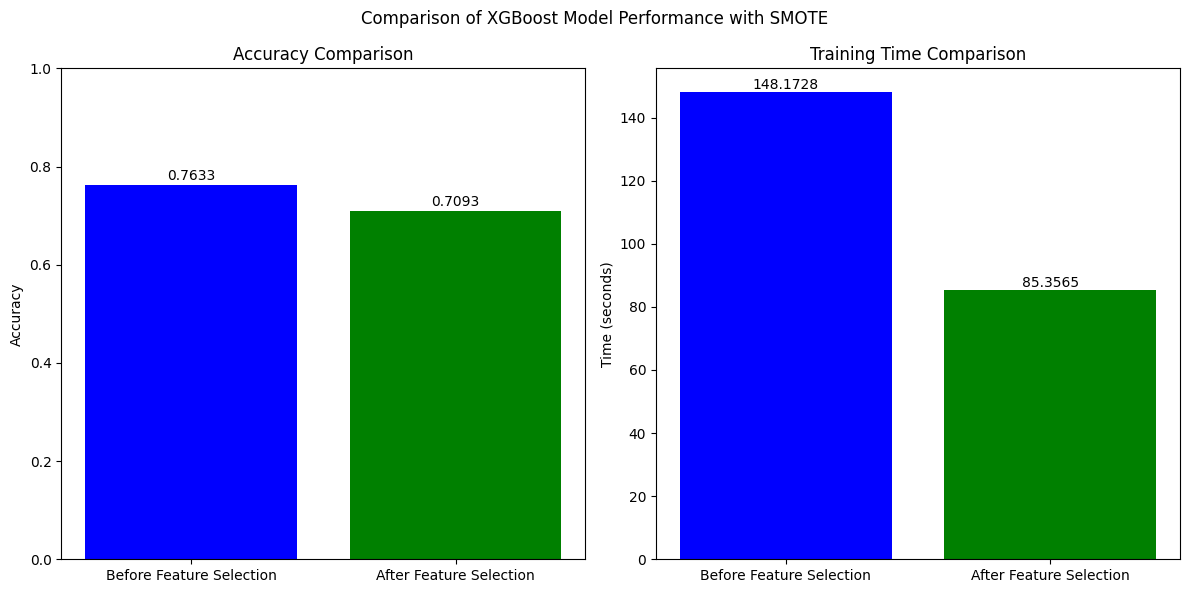

In [ ]:
# Step 6: Visualize the comparison in a bar chart
labels = ['Before Feature Selection', 'After Feature Selection']
accuracy_values = [accuracy_xgboost_smote_before, accuracy_xgboost_smote_after]
time_values = [time_xgboost_smote_before, time_xgboost_smote_after]

# Create a subplot to compare time and accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of XGBoost Model Performance with SMOTE')
# Accuracy comparison
ax[0].bar(labels, accuracy_values, color=['blue', 'green'])
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

for index, data in enumerate(accuracy_values):
    ax[0].text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Time comparison
ax[1].bar(labels, time_values, color=['blue', 'green'])
ax[1].set_title('Training Time Comparison')
ax[1].set_ylabel('Time (seconds)')

for index, data in enumerate(time_values):
    ax[1].text(x=index, y=data + 0.8, s=f"{data:.4f}", ha='center')

plt.tight_layout()
plt.show()

## SMOTEENN

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
print(f"Class distribution before SMOTEENN: {Counter(y)}")
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN to the training data
smoteenn = SMOTEENN(random_state=42)
X_SMOTEENN, y_SMOTEENN = smoteenn.fit_resample(X_train, y_train)

# Show the distribution of classes after SMOTE
print(f"Class distribution after SMOTEENN: {Counter(y_SMOTEENN)}")

Class distribution before SMOTEENN: Counter({0: 5163, 1: 1869})
Class distribution after SMOTEENN: Counter({1: 2523, 0: 2122})


In [ ]:
start = time.time()
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search.fit(X_SMOTEENN, y_SMOTEENN)
end = time.time()
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy_xgboost_smoteenn_before = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy_xgboost_smoteenn_before}")

time_xgboost_smoteenn_before = end - start
print(f'Time : {time_xgboost_smoteenn_before}')

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 450}
Best cross-validation accuracy: 0.9562970936490849
Test set accuracy: 0.751954513148543
Time : 93.63338851928711


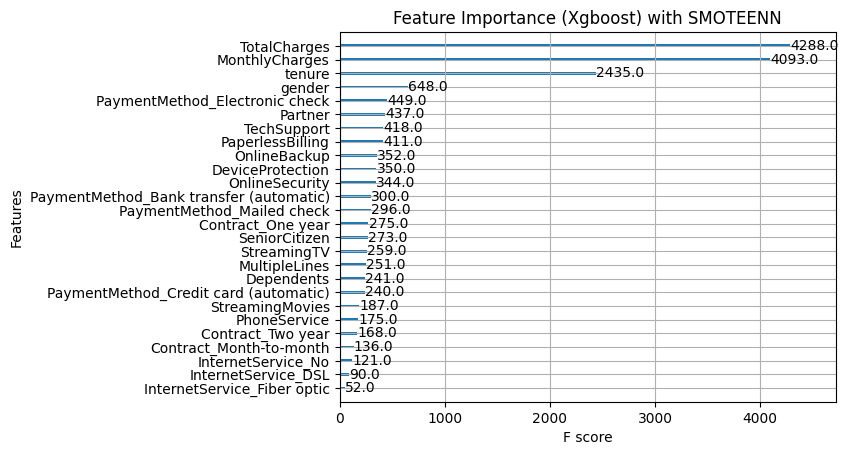

In [ ]:
# Feature Importance Plot
xgb.plot_importance(best_model, importance_type="weight")  # 'weight', 'gain', or 'cover'
plt.title("Feature Importance (Xgboost) with SMOTEENN")
plt.show()

In [ ]:
# Assuming you already have X and y loaded, and you have selected the features for under-sampling
X_smoteenn_fea = X[['MonthlyCharges', 'tenure', 'TotalCharges']]  # Features for smote
y_smoteenn_fea = y  # Target variable

# Show class distribution before smote
print(f"Class distribution before SMOTEENN : {Counter(y_smoteenn_fea)}")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smoteenn_fea, y_smoteenn_fea, test_size=0.2, random_state=42)

# Apply SMOTEENN to the training data
smoteenn = SMOTEENN(random_state=42)
X_train_SMOTEENN, y_train_SMOTEENN = smoteenn.fit_resample(X_train, y_train)

# Show class distribution after smote-sampling
print(f"Class distribution after SMOTEENN sampling: {Counter(y_train_SMOTEENN)}")

Class distribution before SMOTEENN : Counter({0: 5163, 1: 1869})
Class distribution after SMOTEENN sampling: Counter({1: 2325, 0: 2139})


In [ ]:
# Initialize the XGBoost classifier
start = time.time()
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search.fit(X_train_SMOTEENN, y_train_SMOTEENN)
end = time.time()
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
# Evaluate the model
accuracy_xgboost_smoteenn_after = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy_xgboost_smoteenn_after}")

time_xgboost_smoteenn_after = end - start
print(f'Time : {time_xgboost_smoteenn_after}')

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 150}
Best cross-validation accuracy: 0.9542997604688181
Test set accuracy: 0.7057569296375267
Time : 56.97149634361267


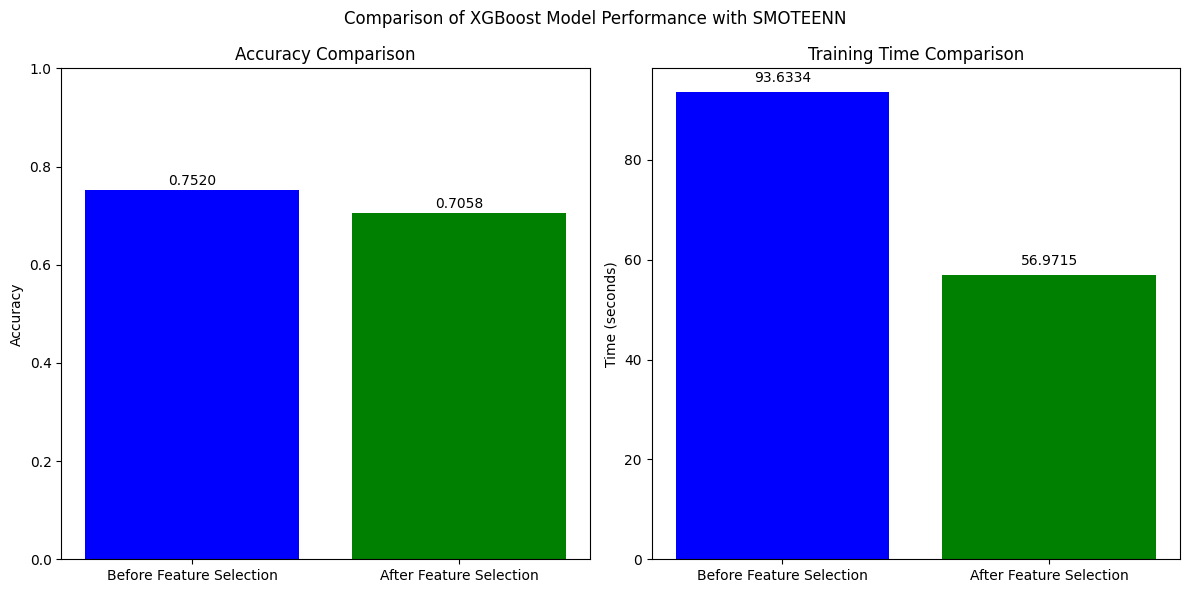

In [ ]:
# Step 6: Visualize the comparison in a bar chart
labels = ['Before Feature Selection', 'After Feature Selection']
accuracy_values = [accuracy_xgboost_smoteenn_before, accuracy_xgboost_smoteenn_after]
time_values = [time_xgboost_smoteenn_before, time_xgboost_smoteenn_after]

# Create a subplot to compare time and accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of XGBoost Model Performance with SMOTEENN')

# Accuracy comparison
ax[0].bar(labels, accuracy_values, color=['blue', 'green'])
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

for index, data in enumerate(accuracy_values):
    ax[0].text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Time comparison
ax[1].bar(labels, time_values, color=['blue', 'green'])
ax[1].set_title('Training Time Comparison')
ax[1].set_ylabel('Time (seconds)')

for index, data in enumerate(time_values):
    ax[1].text(x=index, y=data + 2, s=f"{data:.4f}", ha='center')

plt.tight_layout()
plt.show()

## SMOTETomek

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
print(f"Class distribution before SMOTETomek: {Counter(y)}")
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN to the training data
smote_tomek = SMOTETomek(random_state=42)
X_SMOTETomek, y_SMOTETomek = smote_tomek.fit_resample(X_train, y_train)

# Show the distribution of classes after SMOTETomek
print(f"Class distribution after SMOTETomek: {Counter(y_SMOTETomek)}")

Class distribution before SMOTETomek: Counter({0: 5163, 1: 1869})
Class distribution after SMOTETomek: Counter({1: 3799, 0: 3799})


In [ ]:
start = time.time()
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search.fit(X_SMOTETomek, y_SMOTETomek)
end = time.time()
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy_xgboost_smotetomek_before = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy_xgboost_smotetomek_before}")

time_xgboost_smotetomek_before = end - start
print(f'Time : {time_xgboost_smotetomek_before}')

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250}
Best cross-validation accuracy: 0.8561612556737466
Test set accuracy: 0.7718550106609808
Time : 140.2480607032776


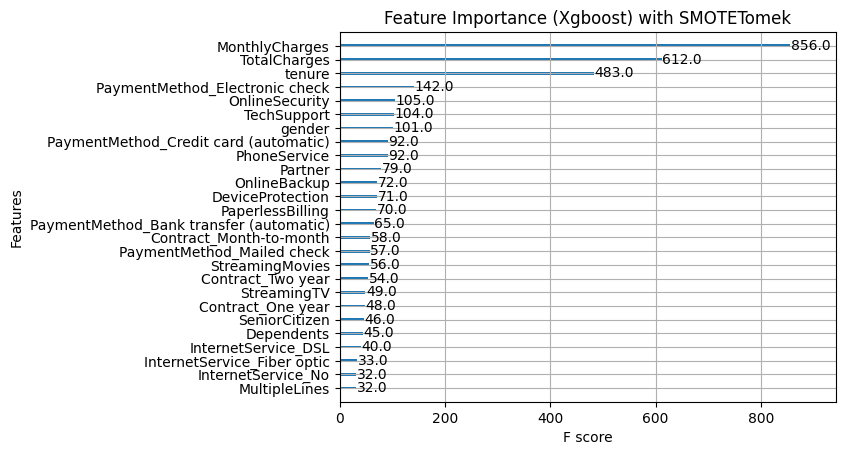

In [ ]:
# Feature Importance Plot
xgb.plot_importance(best_model, importance_type="weight")  # 'weight', 'gain', or 'cover'
plt.title("Feature Importance (Xgboost) with SMOTETomek")
plt.show()

In [ ]:
# Assuming you already have X and y loaded, and you have selected the features for under-sampling
X_SMOTETomek_fea = X[['MonthlyCharges', 'tenure', 'TotalCharges']]  # Features for smote
y_SMOTETomek_fea = y  # Target variable

# Show class distribution before smote
print(f"Class distribution before SMOTETomek : {Counter(y_SMOTETomek_fea)}")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_SMOTETomek_fea, y_SMOTETomek_fea, test_size=0.2, random_state=42)

# Apply SMOTETomek to the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_SMOTETomek, y_train_SMOTETomek = smote_tomek.fit_resample(X_train, y_train)

# Show class distribution after smote-sampling
print(f"Class distribution after SMOTETomek sampling: {Counter(y_train_SMOTETomek)}")

Class distribution before SMOTETomek : Counter({0: 5163, 1: 1869})
Class distribution after SMOTETomek sampling: Counter({1: 3721, 0: 3721})


In [ ]:
# Initialize the XGBoost classifier
start = time.time()
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search.fit(X_train_SMOTETomek, y_train_SMOTETomek)
end = time.time()
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
# Evaluate the model
accuracy_xgboost_smotetomek_after = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy_xgboost_smotetomek_after}")

time_xgboost_smotetomek_after = end - start
print(f'Time : {time_xgboost_smotetomek_after}')

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 450}
Best cross-validation accuracy: 0.8081201210309293
Test set accuracy: 0.7071783937455579
Time : 81.51410508155823


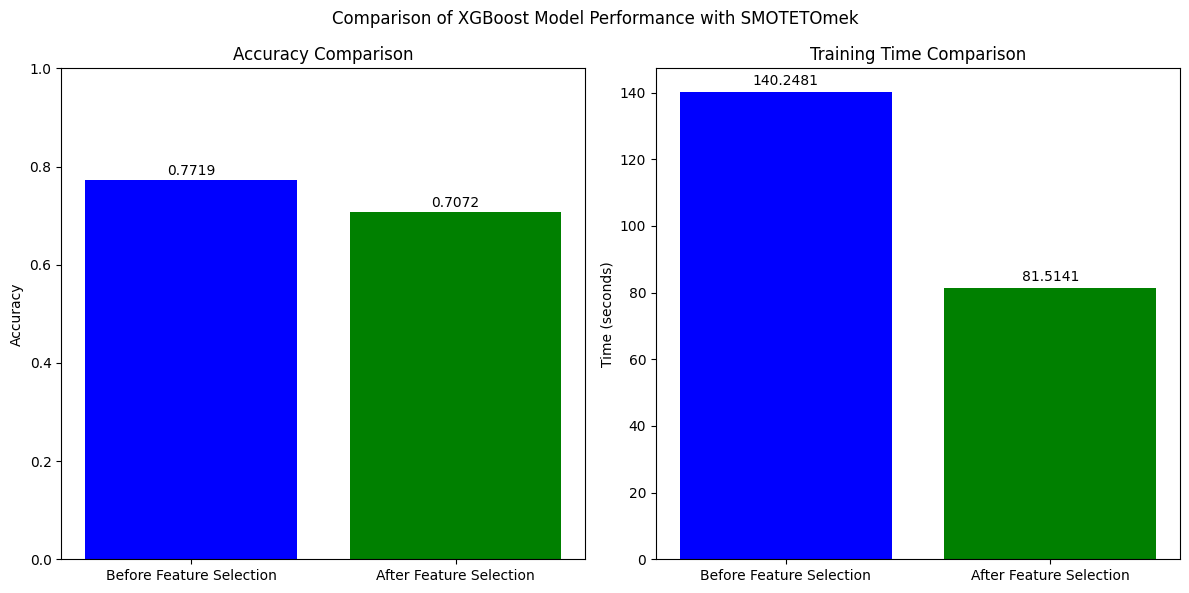

In [ ]:
# Step 6: Visualize the comparison in a bar chart
labels = ['Before Feature Selection', 'After Feature Selection']
accuracy_values = [accuracy_xgboost_smotetomek_before, accuracy_xgboost_smotetomek_after]
time_values = [time_xgboost_smotetomek_before, time_xgboost_smotetomek_after]

# Create a subplot to compare time and accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of XGBoost Model Performance with SMOTETOmek')

# Accuracy comparison
ax[0].bar(labels, accuracy_values, color=['blue', 'green'])
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

for index, data in enumerate(accuracy_values):
    ax[0].text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Time comparison
ax[1].bar(labels, time_values, color=['blue', 'green'])
ax[1].set_title('Training Time Comparison')
ax[1].set_ylabel('Time (seconds)')

for index, data in enumerate(time_values):
    ax[1].text(x=index, y=data + 2, s=f"{data:.4f}", ha='center')

plt.tight_layout()
plt.show()

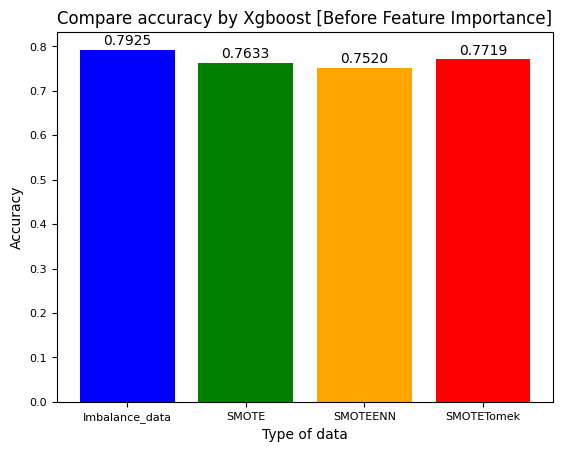

In [ ]:
type_of_data = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
acc = [accuracy_xgboost_imbalance_before,
         accuracy_xgboost_smote_before,
         accuracy_xgboost_smoteenn_before,
         accuracy_xgboost_smotetomek_before]

for index, data in enumerate(acc):
    plt.text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Reduce font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size of tick labels
bars = plt.bar(type_of_data, acc, color=['blue', 'green', 'orange', 'red'])  # Custom colors for each bar

# plt.bar(type_of_data, acc)
plt.title('Compare accuracy by Xgboost [Before Feature Importance]')
plt.xlabel('Type of data')
plt.ylabel('Accuracy')
plt.show()

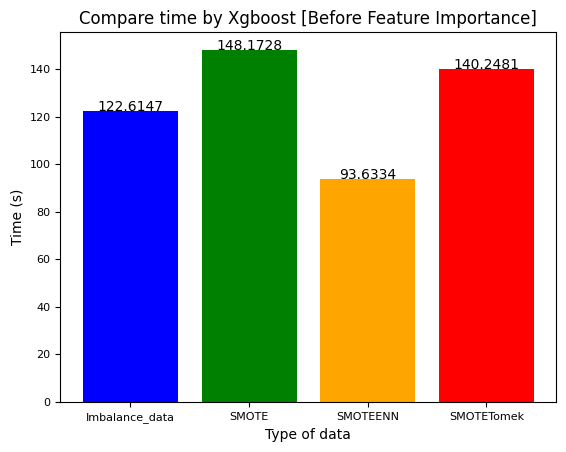

In [ ]:
type_of_data = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
acc = [time_xgboost_imbalance_before,
         time_xgboost_smote_before,
         time_xgboost_smoteenn_before,
         time_xgboost_smotetomek_before]

for index, data in enumerate(acc):
    plt.text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Reduce font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size of tick labels
bars = plt.bar(type_of_data, acc, color=['blue', 'green', 'orange', 'red'])  # Custom colors for each bar

# plt.bar(type_of_data, acc)
plt.title('Compare time by Xgboost [Before Feature Importance]')
plt.xlabel('Type of data')
plt.ylabel('Time (s)')
plt.show()

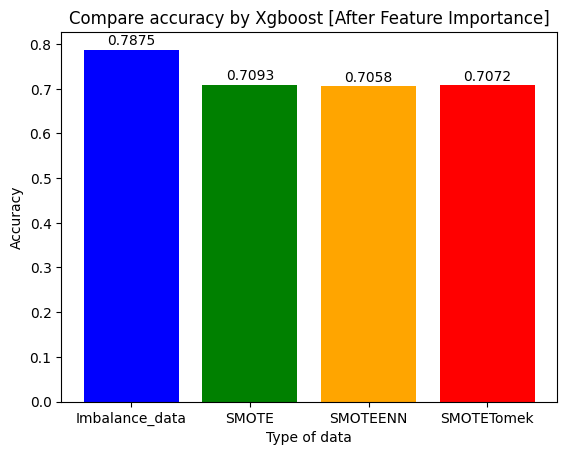

In [ ]:
type_of_data = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
acc = [accuracy_xgboost_imbalance_after,
         accuracy_xgboost_smote_after,
         accuracy_xgboost_smoteenn_after,
         accuracy_xgboost_smotetomek_after]

for index, data in enumerate(acc):
    plt.text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Reduce font size for tick labels
# plt.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size of tick labels
bars = plt.bar(type_of_data, acc, color=['blue', 'green', 'orange', 'red'])  # Custom colors for each bar

# plt.bar(type_of_data, acc)
plt.title('Compare accuracy by Xgboost [After Feature Importance]')
plt.xlabel('Type of data')
plt.ylabel('Accuracy')
plt.show()

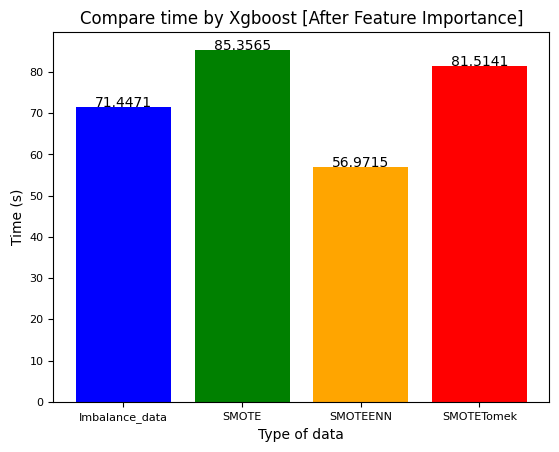

In [ ]:
type_of_data = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
acc = [time_xgboost_imbalance_after,
         time_xgboost_smote_after,
         time_xgboost_smoteenn_after,
         time_xgboost_smotetomek_after]

for index, data in enumerate(acc):
    plt.text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Reduce font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size of tick labels
bars = plt.bar(type_of_data, acc, color=['blue', 'green', 'orange', 'red'])  # Custom colors for each bar

# plt.bar(type_of_data, acc)
plt.title('Compare time by Xgboost [After Feature Importance]')
plt.xlabel('Type of data')
# plt.ylabel('Time')
plt.ylabel('Time (s)')
plt.show()

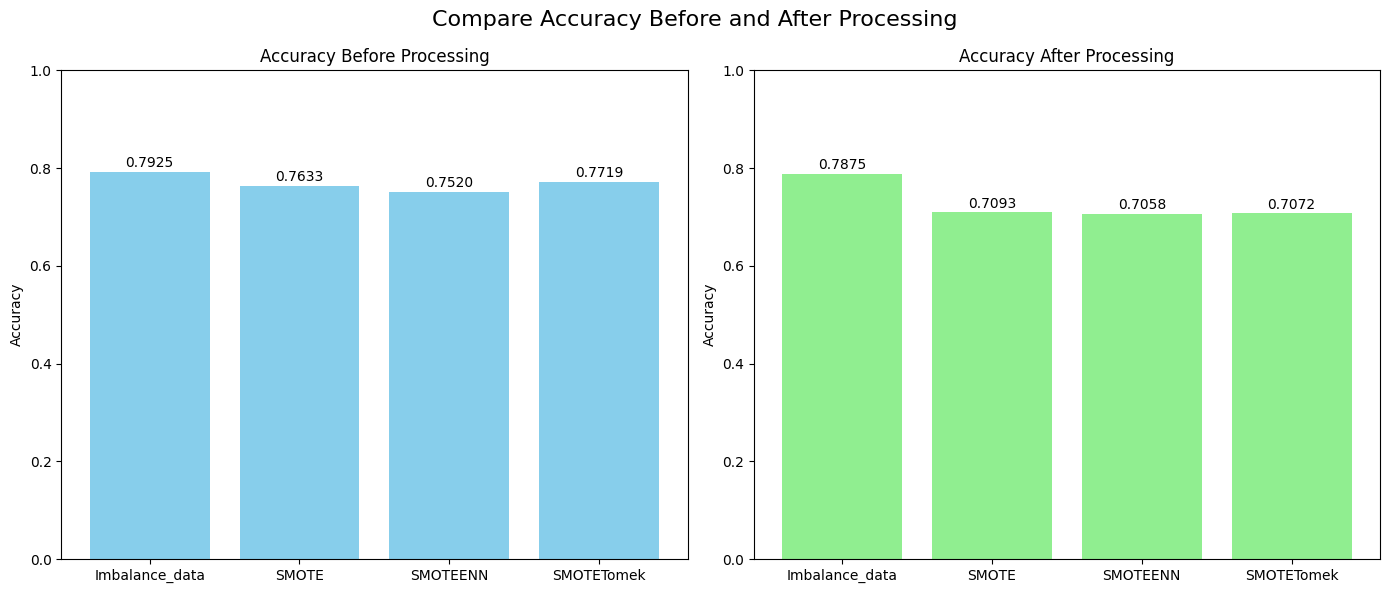

In [ ]:
# Accuracy values for the first graph (before processing)
accuracy_before = [accuracy_xgboost_imbalance_before,
         accuracy_xgboost_smote_before,
         accuracy_xgboost_smoteenn_before,
         accuracy_xgboost_smotetomek_before]
labels_before = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']

# Accuracy values for the second graph (after processing)
accuracy_after = [accuracy_xgboost_imbalance_after,
         accuracy_xgboost_smote_after,
         accuracy_xgboost_smoteenn_after,
         accuracy_xgboost_smotetomek_after]
labels_after = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']

# Create a figure with 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first bar chart (before)
ax[0].bar(labels_before, accuracy_before, color='skyblue')
ax[0].set_title('Accuracy Before Processing')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)  # Set y-axis to range from 0 to 1
for i, value in enumerate(accuracy_before):
    ax[0].text(i, value + 0.01, f"{value:.4f}", ha='center', fontsize=10)

# Plot the second bar chart (after)
ax[1].bar(labels_after, accuracy_after, color='lightgreen')
ax[1].set_title('Accuracy After Processing')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0, 1)  # Set y-axis to range from 0 to 1
for i, value in enumerate(accuracy_after):
    ax[1].text(i, value + 0.01, f"{value:.4f}", ha='center', fontsize=10)

# Add a common title for both subplots
fig.suptitle('Compare Accuracy Before and After Processing', fontsize=16)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Processing (Random Forest)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import time

from collections import Counter

# Under sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

## Data Imbalance

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
start = time.time()

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    # 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}


# Use GridSearchCV to tune hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search_rf.fit(X_train, y_train)

end = time.time()

# Print the best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_}")

# Predict on the test set with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_imbalance_before = accuracy_score(y_test, y_pred_rf)
print(f"Test set accuracy for Random Forest: {accuracy_rf_imbalance_before}")
time_rf_imbalance_before = end - start
print(f'Time for Random Forest: {time_rf_imbalance_before}')

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for Random Forest: {'max_depth': 6, 'n_estimators': 250}
Best cross-validation accuracy for Random Forest: 0.8067555555555556
Test set accuracy for Random Forest: 0.7938877043354655
Time for Random Forest: 65.0293025970459


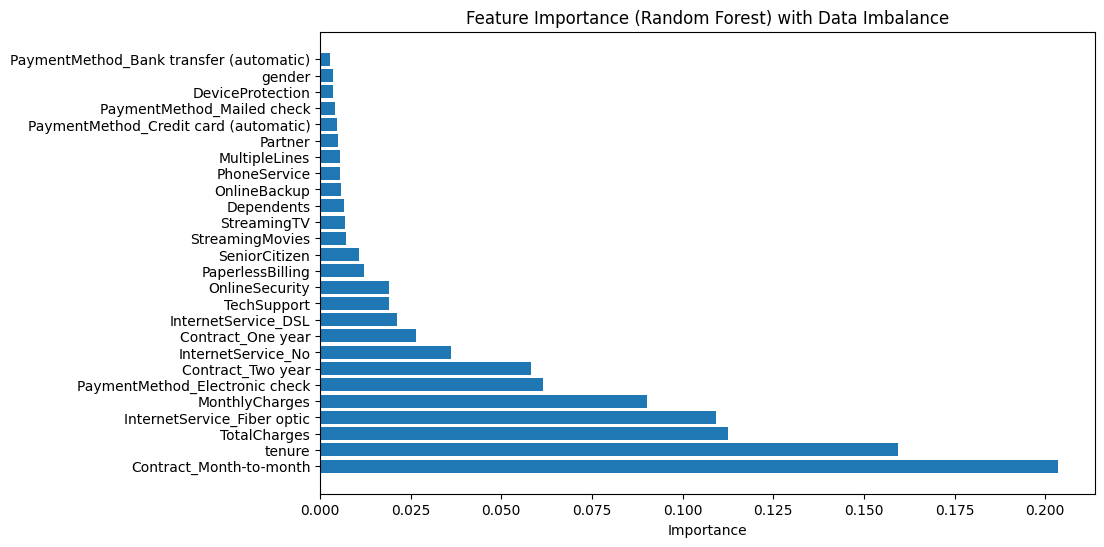

Contract_Month-to-month: 0.20354433943772082
tenure: 0.15953867121551973
TotalCharges: 0.11241655227870744
InternetService_Fiber optic: 0.10925346191255275
MonthlyCharges: 0.09018173630247482
PaymentMethod_Electronic check: 0.06151570695106903
Contract_Two year: 0.058186308587599905
InternetService_No: 0.03608275387213053
Contract_One year: 0.026378450152058287
InternetService_DSL: 0.021124174369957498
TechSupport: 0.018971087478860303
OnlineSecurity: 0.018918626292003176
PaperlessBilling: 0.012016038884025198
SeniorCitizen: 0.010849024238482568
StreamingMovies: 0.007188273381947134
StreamingTV: 0.0067646512257029294
Dependents: 0.006592704253743944
OnlineBackup: 0.005758352792224573
PhoneService: 0.005540954087297397
MultipleLines: 0.005475181769470288
Partner: 0.005025003910082458
PaymentMethod_Credit card (automatic): 0.004639650442302395
PaymentMethod_Mailed check: 0.004138375946042213
DeviceProtection: 0.003528741182338996
gender: 0.003473166727499125
PaymentMethod_Bank transfer (

In [ ]:
# Get the feature importances
importances = best_rf_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest) with Data Imbalance")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.show()

# Print the feature importances
for i in range(X.shape[1]):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

In [ ]:
X_imbalance_fea = X[['TotalCharges', 'tenure', 'Contract_Month-to-month']]
y_imbalance_fea = y
X_train, X_test, y_train, y_test = train_test_split(X_imbalance_fea, y_imbalance_fea, test_size=0.2, random_state=42)

In [ ]:
start = time.time()

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    # 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}


# Use GridSearchCV to tune hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search_rf.fit(X_train, y_train)

end = time.time()

# Print the best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_}")

# Predict on the test set with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_imbalance_after = accuracy_score(y_test, y_pred_rf)
print(f"Test set accuracy for Random Forest: {accuracy_rf_imbalance_after}")
time_rf_imbalance_after = end - start
print(f'Time for Random Forest: {time_rf_imbalance_after}')

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for Random Forest: {'max_depth': 8, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.7856
Test set accuracy for Random Forest: 0.7882018479033405
Time for Random Forest: 60.35720944404602


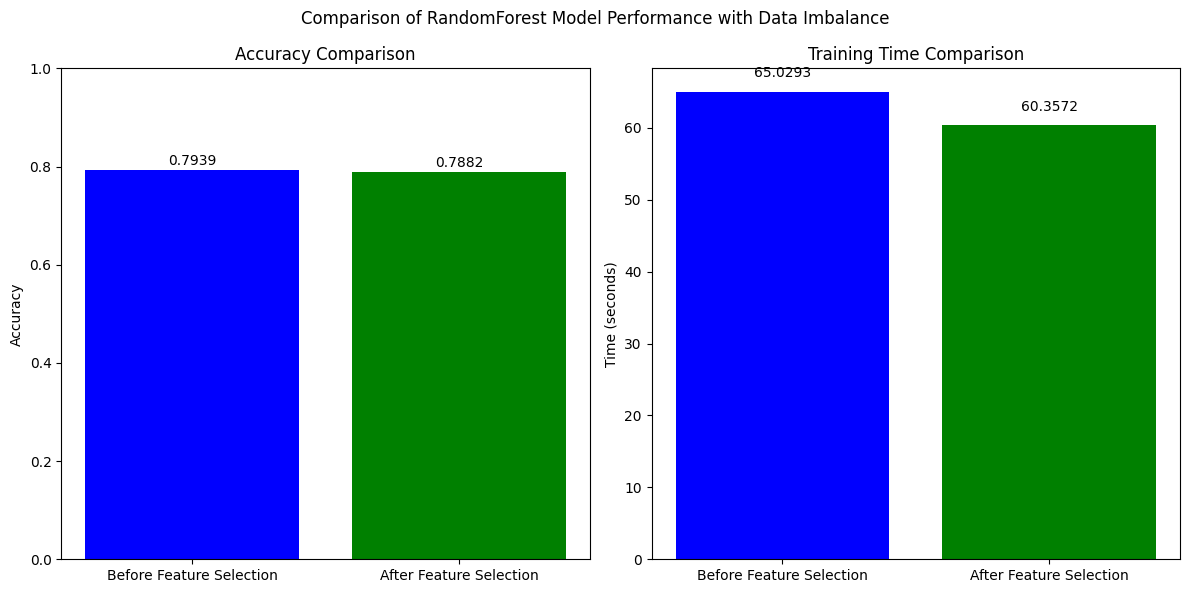

In [ ]:
labels = ['Before Feature Selection', 'After Feature Selection']
accuracy_values = [accuracy_rf_imbalance_before, accuracy_rf_imbalance_after]
time_values = [time_rf_imbalance_before, time_rf_imbalance_after]

# Create a subplot to compare time and accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of RandomForest Model Performance with Data Imbalance')

# Accuracy comparison
ax[0].bar(labels, accuracy_values, color=['blue', 'green'])
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

for index, data in enumerate(accuracy_values):
    ax[0].text(x=index, y=data + 0, s=f"{data:.4f}", ha='center')

# Time comparison
ax[1].bar(labels, time_values, color=['blue', 'green'])
ax[1].set_title('Training Time Comparison')
ax[1].set_ylabel('Time (seconds)')

for index, data in enumerate(time_values):
    ax[1].text(x=index, y=data + 2, s=f"{data:.4f}", ha='center')

plt.tight_layout()
plt.show()

## SMOTE

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
print(f"Class distribution before SMOTE: {Counter(y)}")
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = smote.fit_resample(X_train, y_train)

# Show the distribution of classes after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_SMOTE)}")

Class distribution before SMOTE: Counter({0: 5163, 1: 1869})
Class distribution after SMOTE: Counter({1: 4130, 0: 4130})


In [ ]:
start = time.time()

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    # 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}


# Use GridSearchCV to tune hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search_rf.fit(X_SMOTE, y_SMOTE)

end = time.time()

# Print the best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_}")

# Predict on the test set with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_smote_before = accuracy_score(y_test, y_pred_rf)
print(f"Test set accuracy for Random Forest: {accuracy_rf_smote_before}")
time_rf_smote_before = end - start
print(f'Time for Random Forest: {time_rf_smote_before}')

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 400}
Best cross-validation accuracy for Random Forest: 0.8375302663438257
Test set accuracy for Random Forest: 0.7633262260127932
Time for Random Forest: 79.1687536239624


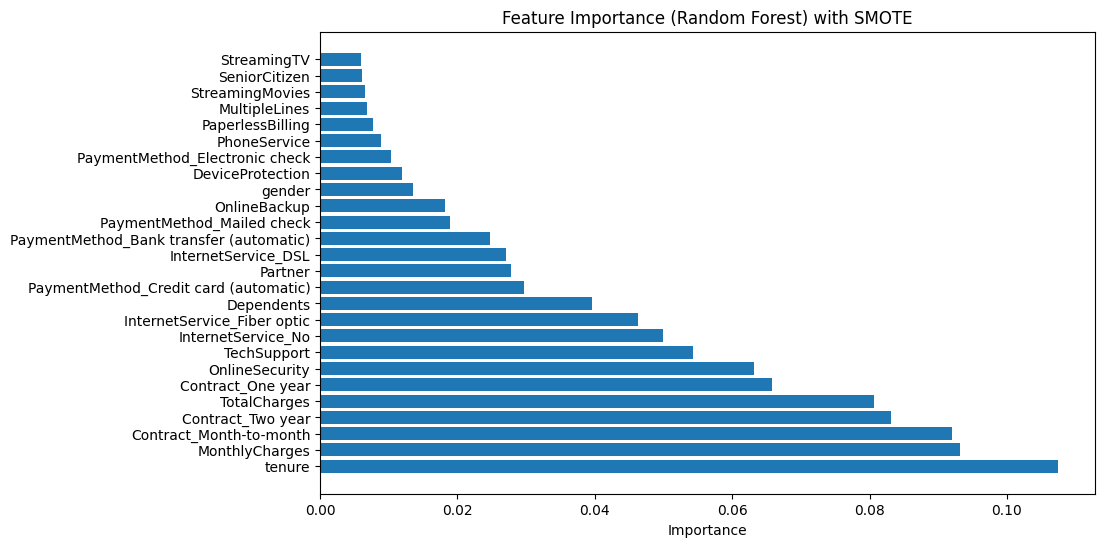

tenure: 0.10743920106275642
MonthlyCharges: 0.09315073413552181
Contract_Month-to-month: 0.09198954165918385
Contract_Two year: 0.08312489665808026
TotalCharges: 0.08068450877381604
Contract_One year: 0.06583858198866234
OnlineSecurity: 0.06312952167885684
TechSupport: 0.05433403013505474
InternetService_No: 0.0499137056151924
InternetService_Fiber optic: 0.04627325171523794
Dependents: 0.03956695115565348
PaymentMethod_Credit card (automatic): 0.02971223208385487
Partner: 0.027844598130401407
InternetService_DSL: 0.027115757433376388
PaymentMethod_Bank transfer (automatic): 0.0247891735991169
PaymentMethod_Mailed check: 0.01889087866971957
OnlineBackup: 0.01821919184033256
gender: 0.013515871473245305
DeviceProtection: 0.011942723839611558
PaymentMethod_Electronic check: 0.010394460077633155
PhoneService: 0.008948876424174603
PaperlessBilling: 0.007730779456314486
MultipleLines: 0.006847107498512045
StreamingMovies: 0.006526141592706689
SeniorCitizen: 0.0060922519177179675
StreamingTV

In [ ]:
# Get the feature importances
importances = best_rf_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest) with SMOTE")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.show()

# Print the feature importances
for i in range(X.shape[1]):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

In [ ]:
# Assuming you already have X and y loaded, and you have selected the features for under-sampling
X_smote_fea = X[['Contract_Month-to-month', 'MonthlyCharges', 'tenure']]
y_smote_fea = y  # Target variable

# Show class distribution before smote
print(f"Class distribution before SMOTE : {Counter(y_smote_fea)}")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote_fea, y_smote_fea, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Show class distribution after smote-sampling
print(f"Class distribution after SMOTE sampling: {Counter(y_train_SMOTE)}")

Class distribution before SMOTE : Counter({0: 5163, 1: 1869})
Class distribution after SMOTE sampling: Counter({1: 4130, 0: 4130})


In [ ]:
start = time.time()

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    # 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}


# Use GridSearchCV to tune hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search_rf.fit(X_train_SMOTE, y_train_SMOTE)

end = time.time()

# Print the best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_}")

# Predict on the test set with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_smote_after = accuracy_score(y_test, y_pred_rf)
print(f"Test set accuracy for Random Forest: {accuracy_rf_smote_after}")
time_rf_smote_after = end - start
print(f'Time for Random Forest: {time_rf_smote_after}')

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 400}
Best cross-validation accuracy for Random Forest: 0.7799031476997579
Test set accuracy for Random Forest: 0.7199715707178393
Time for Random Forest: 66.25229048728943


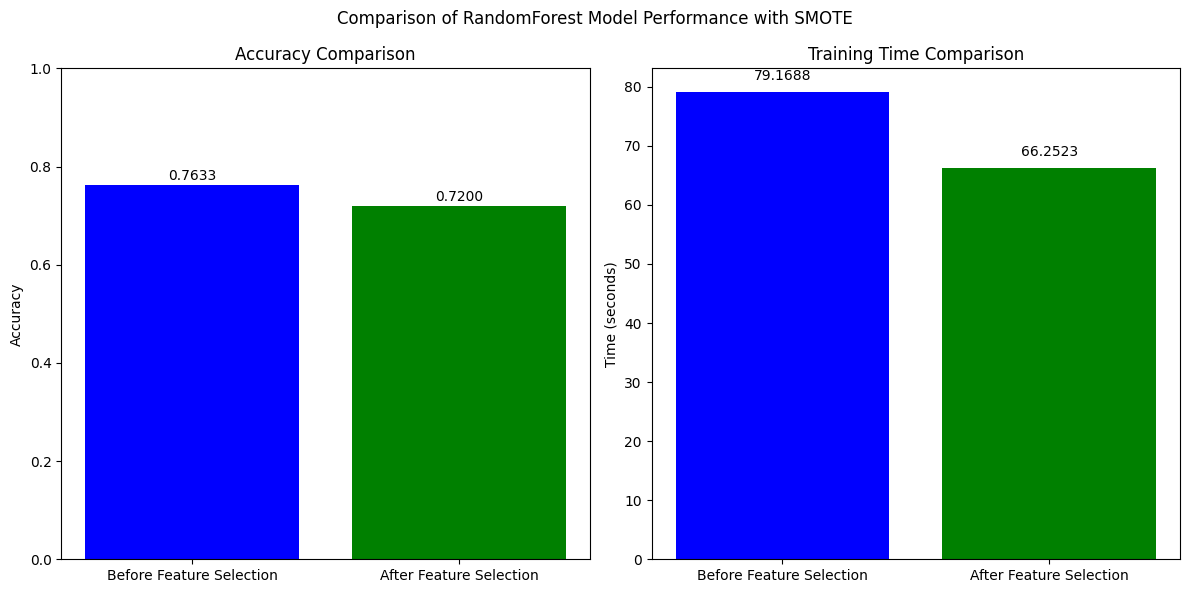

In [ ]:
# Step 6: Visualize the comparison in a bar chart
labels = ['Before Feature Selection', 'After Feature Selection']
accuracy_values = [accuracy_rf_smote_before, accuracy_rf_smote_after]
time_values = [time_rf_smote_before, time_rf_smote_after]

# Create a subplot to compare time and accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of RandomForest Model Performance with SMOTE')
# Accuracy comparison
ax[0].bar(labels, accuracy_values, color=['blue', 'green'])
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

for index, data in enumerate(accuracy_values):
    ax[0].text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Time comparison
ax[1].bar(labels, time_values, color=['blue', 'green'])
ax[1].set_title('Training Time Comparison')
ax[1].set_ylabel('Time (seconds)')

for index, data in enumerate(time_values):
    ax[1].text(x=index, y=data + 2, s=f"{data:.4f}", ha='center')

plt.tight_layout()
plt.show()

## SMOTEENN

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
print(f"Class distribution before SMOTEENN: {Counter(y)}")
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN to the training data
smoteenn = SMOTEENN(random_state=42)
X_SMOTEENN, y_SMOTEENN = smoteenn.fit_resample(X_train, y_train)

# Show the distribution of classes after SMOTEENN
print(f"Class distribution after SMOTEENN: {Counter(y_SMOTEENN)}")

Class distribution before SMOTEENN: Counter({0: 5163, 1: 1869})
Class distribution after SMOTEENN: Counter({1: 2523, 0: 2122})


In [ ]:
start = time.time()

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    # 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}


# Use GridSearchCV to tune hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search_rf.fit(X_SMOTEENN, y_SMOTEENN)

end = time.time()

# Print the best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_}")

# Predict on the test set with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_smoteenn_before = accuracy_score(y_test, y_pred_rf)
print(f"Test set accuracy for Random Forest: {accuracy_rf_smoteenn_before}")
time_rf_smoteenn_before = end - start
print(f'Time for Random Forest: {time_rf_smoteenn_before}')

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 350}
Best cross-validation accuracy for Random Forest: 0.9517761033369213
Test set accuracy for Random Forest: 0.7420042643923241
Time for Random Forest: 53.462578535079956


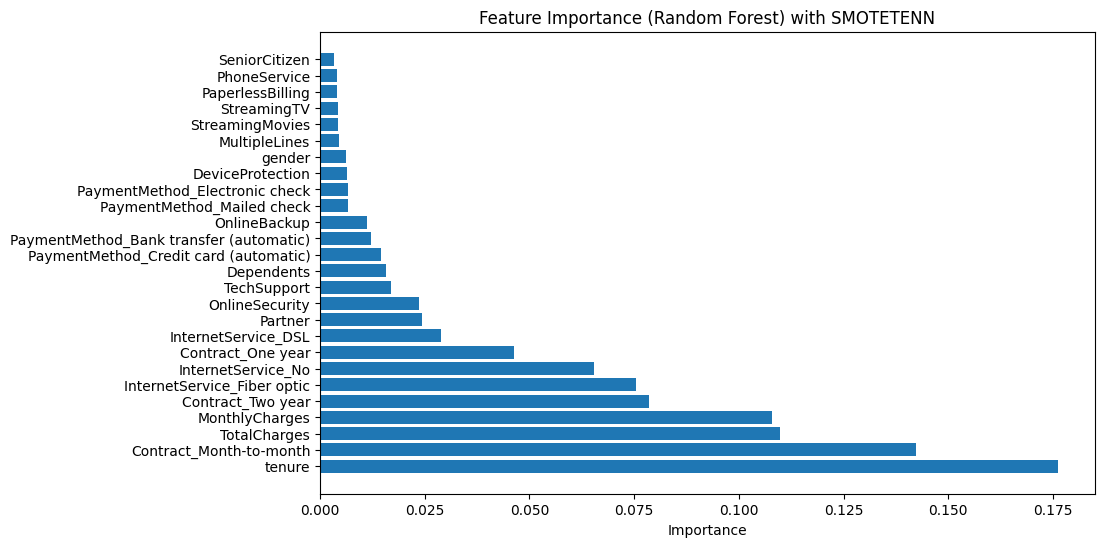

tenure: 0.17618853175778879
Contract_Month-to-month: 0.14231492053072423
TotalCharges: 0.10976002181619383
MonthlyCharges: 0.10778653238406949
Contract_Two year: 0.07865929756186847
InternetService_Fiber optic: 0.07532815078973698
InternetService_No: 0.06536027089237685
Contract_One year: 0.04624595041869322
InternetService_DSL: 0.028960842464722032
Partner: 0.024405642841436467
OnlineSecurity: 0.023571124267283777
TechSupport: 0.016942987091908276
Dependents: 0.015736950541153743
PaymentMethod_Credit card (automatic): 0.014676219257867796
PaymentMethod_Bank transfer (automatic): 0.012226497754127841
OnlineBackup: 0.011252626202146475
PaymentMethod_Mailed check: 0.006708698252995503
PaymentMethod_Electronic check: 0.006673201182846435
DeviceProtection: 0.006456861342214847
gender: 0.006190474616128147
MultipleLines: 0.004448709914895927
StreamingMovies: 0.0044172648464312295
StreamingTV: 0.004296206240729803
PaperlessBilling: 0.004064754830553568
PhoneService: 0.004033858529429331
Seni

In [ ]:
# Get the feature importances
importances = best_rf_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest) with SMOTETENN")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.show()

# Print the feature importances
for i in range(X.shape[1]):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

In [ ]:
# Assuming you already have X and y loaded, and you have selected the features for under-sampling
X_smoteenn_fea = X[['TotalCharges', 'tenure', 'Contract_Month-to-month']]
y_smoteenn_fea = y  # Target variable

# Show class distribution before smote
print(f"Class distribution before SMOTEENN : {Counter(y_smoteenn_fea)}")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smoteenn_fea, y_smoteenn_fea, test_size=0.2, random_state=42)

# Apply SMOTEENN to the training data
smoteenn = SMOTEENN(random_state=42)
X_train_SMOTEENN, y_train_SMOTEENN = smoteenn.fit_resample(X_train, y_train)

# Show class distribution after smote-sampling
print(f"Class distribution after SMOTEENN sampling: {Counter(y_train_SMOTEENN)}")

Class distribution before SMOTEENN : Counter({0: 5163, 1: 1869})
Class distribution after SMOTEENN sampling: Counter({1: 2184, 0: 2038})


In [ ]:
start = time.time()

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    # 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}


# Use GridSearchCV to tune hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search_rf.fit(X_train_SMOTEENN, y_train_SMOTEENN)

end = time.time()

# Print the best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_}")

# Predict on the test set with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_smoteenn_after = accuracy_score(y_test, y_pred_rf)
print(f"Test set accuracy for Random Forest: {accuracy_rf_smoteenn_after}")
time_rf_smoteenn_after = end - start
print(f'Time for Random Forest: {time_rf_smoteenn_after}')

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 150}
Best cross-validation accuracy for Random Forest: 0.9426806696766595
Test set accuracy for Random Forest: 0.7078891257995735
Time for Random Forest: 46.51134276390076


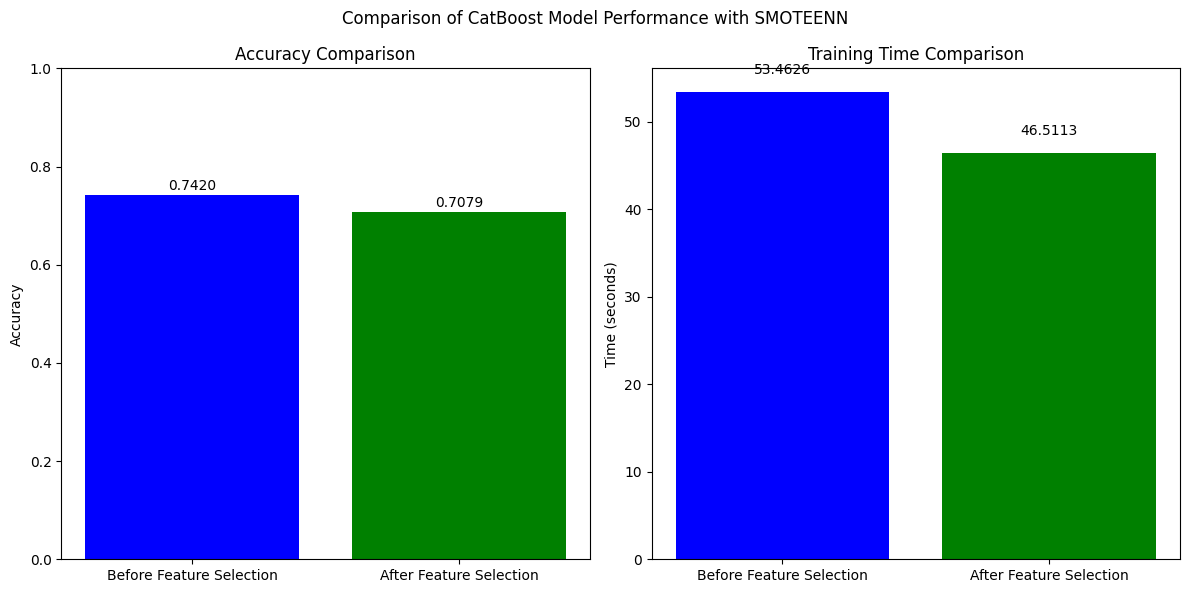

In [ ]:
# Step 6: Visualize the comparison in a bar chart
labels = ['Before Feature Selection', 'After Feature Selection']
accuracy_values = [accuracy_rf_smoteenn_before, accuracy_rf_smoteenn_after]
time_values = [time_rf_smoteenn_before, time_rf_smoteenn_after]

# Create a subplot to compare time and accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of CatBoost Model Performance with SMOTEENN')

# Accuracy comparison
ax[0].bar(labels, accuracy_values, color=['blue', 'green'])
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

for index, data in enumerate(accuracy_values):
    ax[0].text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Time comparison
ax[1].bar(labels, time_values, color=['blue', 'green'])
ax[1].set_title('Training Time Comparison')
ax[1].set_ylabel('Time (seconds)')

for index, data in enumerate(time_values):
    ax[1].text(x=index, y=data + 2, s=f"{data:.4f}", ha='center')

plt.tight_layout()
plt.show()

## SMOTETomek

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
print(f"Class distribution before SMOTETomek: {Counter(y)}")
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN to the training data
smote_tomek = SMOTETomek(random_state=42)
X_SMOTETomek, y_SMOTETomek = smote_tomek.fit_resample(X_train, y_train)

# Show the distribution of classes after SMOTE
print(f"Class distribution after SMOTETomek: {Counter(y_SMOTETomek)}")

Class distribution before SMOTETomek: Counter({0: 5163, 1: 1869})
Class distribution after SMOTETomek: Counter({1: 3799, 0: 3799})


In [ ]:
start = time.time()

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    # 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}


# Use GridSearchCV to tune hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search_rf.fit(X_SMOTETomek, y_SMOTETomek)

end = time.time()

# Print the best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_}")

# Predict on the test set with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_smotetomek_before = accuracy_score(y_test, y_pred_rf)
print(f"Test set accuracy for Random Forest: {accuracy_rf_smotetomek_before}")
time_rf_smotetomek_before = end - start
print(f'Time for Random Forest: {time_rf_smotetomek_before}')

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8510256921104604
Test set accuracy for Random Forest: 0.7633262260127932
Time for Random Forest: 71.4391839504242


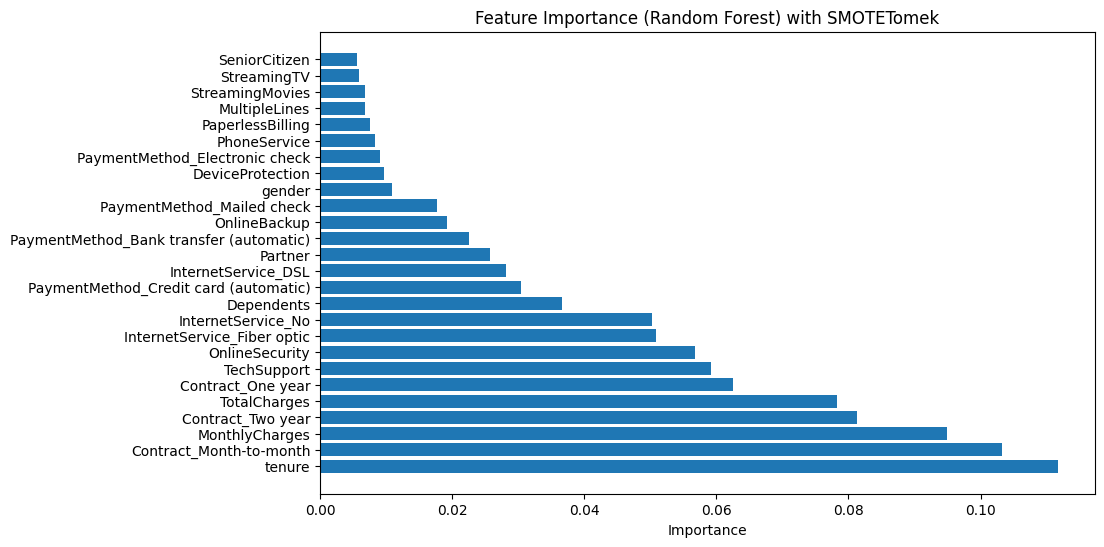

tenure: 0.11173229902259389
Contract_Month-to-month: 0.10319744538476346
MonthlyCharges: 0.09484626508694892
Contract_Two year: 0.08134739111818512
TotalCharges: 0.07821461080563581
Contract_One year: 0.06251446425792394
TechSupport: 0.05913647176481774
OnlineSecurity: 0.056704214640355875
InternetService_Fiber optic: 0.05091497047132178
InternetService_No: 0.050294134468418926
Dependents: 0.036681850591533026
PaymentMethod_Credit card (automatic): 0.030404459993244426
InternetService_DSL: 0.028234828095770943
Partner: 0.02567397793118855
PaymentMethod_Bank transfer (automatic): 0.022485955534164874
OnlineBackup: 0.019272955797067327
PaymentMethod_Mailed check: 0.017705202777142617
gender: 0.010851286051674045
DeviceProtection: 0.00969195635775234
PaymentMethod_Electronic check: 0.00915624033020305
PhoneService: 0.008265257707906436
PaperlessBilling: 0.007600899041237799
MultipleLines: 0.006809790491516016
StreamingMovies: 0.006757004650025143
StreamingTV: 0.005845017062129867
SeniorCi

In [ ]:
# Get the feature importances
importances = best_rf_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest) with SMOTETomek")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.show()

# Print the feature importances
for i in range(X.shape[1]):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

In [ ]:
# Assuming you already have X and y loaded, and you have selected the features for under-sampling
X_SMOTETomek_fea = X[['MonthlyCharges', 'Contract_Month-to-month', 'tenure']]
y_SMOTETomek_fea = y  # Target variable

# Show class distribution before smote
print(f"Class distribution before SMOTETomek : {Counter(y_SMOTETomek_fea)}")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_SMOTETomek_fea, y_SMOTETomek_fea, test_size=0.2, random_state=42)

# Apply SMOTETomek to the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_SMOTETomek, y_train_SMOTETomek = smote_tomek.fit_resample(X_train, y_train)

# Show class distribution after smote-sampling
print(f"Class distribution after SMOTETomek sampling: {Counter(y_train_SMOTETomek)}")

Class distribution before SMOTETomek : Counter({0: 5163, 1: 1869})
Class distribution after SMOTETomek sampling: Counter({1: 3791, 0: 3791})


In [ ]:
start = time.time()

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [1, 2, 4, 5, 6, 8, 10],            # Depth of the tree
    # 'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 0.75], # Step size shrinking
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # Number of boosting rounds
}


# Use GridSearchCV to tune hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model to the training data using GridSearch
grid_search_rf.fit(X_train_SMOTETomek, y_train_SMOTETomek)

end = time.time()

# Print the best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_}")

# Predict on the test set with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf_smotetomek_after = accuracy_score(y_test, y_pred_rf)
print(f"Test set accuracy for Random Forest: {accuracy_rf_smotetomek_after}")
time_rf_smotetomek_after = end - start
print(f'Time for Random Forest: {time_rf_smotetomek_after}')

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.810999351240036
Test set accuracy for Random Forest: 0.7221037668798863
Time for Random Forest: 63.60864877700806


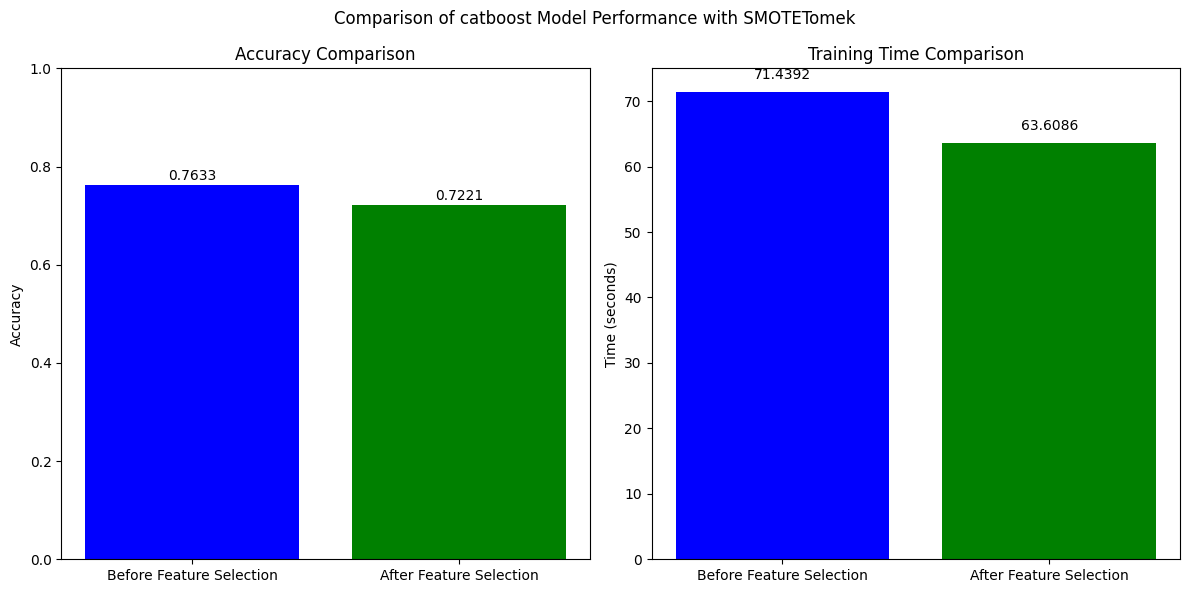

In [ ]:
# Step 6: Visualize the comparison in a bar chart
labels = ['Before Feature Selection', 'After Feature Selection']
accuracy_values = [accuracy_rf_smotetomek_before, accuracy_rf_smotetomek_after]
time_values = [time_rf_smotetomek_before, time_rf_smotetomek_after]

# Create a subplot to compare time and accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparison of catboost Model Performance with SMOTETomek')

# Accuracy comparison
ax[0].bar(labels, accuracy_values, color=['blue', 'green'])
ax[0].set_title('Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

for index, data in enumerate(accuracy_values):
    ax[0].text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Time comparison
ax[1].bar(labels, time_values, color=['blue', 'green'])
ax[1].set_title('Training Time Comparison')
ax[1].set_ylabel('Time (seconds)')

for index, data in enumerate(time_values):
    ax[1].text(x=index, y=data + 2, s=f"{data:.4f}", ha='center')

plt.tight_layout()
plt.show()

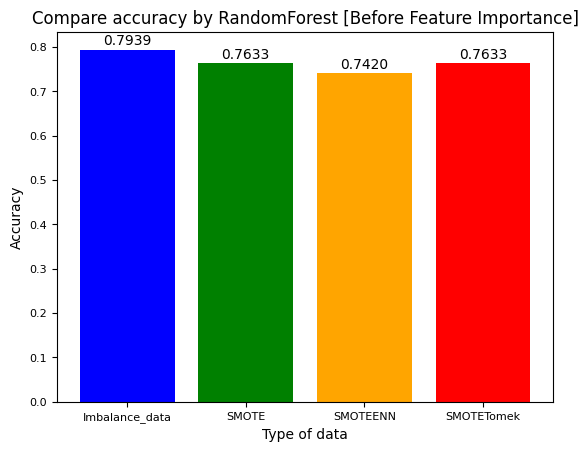

In [ ]:
type_of_data = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
acc = [accuracy_rf_imbalance_before,
         accuracy_rf_smote_before,
         accuracy_rf_smoteenn_before,
         accuracy_rf_smotetomek_before]

for index, data in enumerate(acc):
    plt.text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Reduce font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size of tick labels

bars = plt.bar(type_of_data, acc, color=['blue', 'green', 'orange', 'red'])  # Custom colors for each bar
# plt.bar(type_of_data, acc)
plt.title('Compare accuracy by RandomForest [Before Feature Importance]')
plt.xlabel('Type of data')
plt.ylabel('Accuracy')
plt.show()

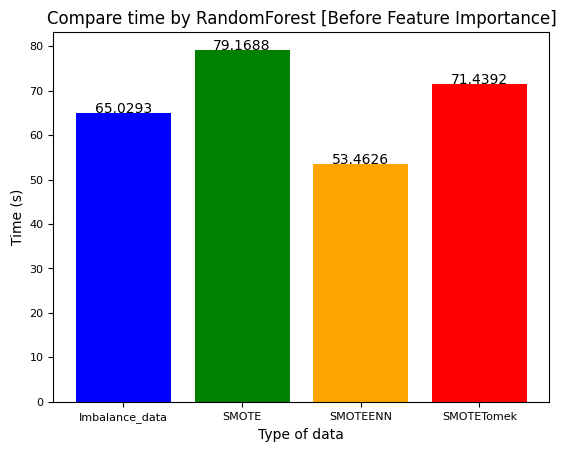

In [ ]:
type_of_data = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
acc = [time_rf_imbalance_before,
         time_rf_smote_before,
         time_rf_smoteenn_before,
         time_rf_smotetomek_before]

for index, data in enumerate(acc):
    plt.text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Reduce font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size of tick labels

bars = plt.bar(type_of_data, acc, color=['blue', 'green', 'orange', 'red'])  # Custom colors for each bar
# plt.bar(type_of_data, acc)
plt.title('Compare time by RandomForest [Before Feature Importance]')
plt.xlabel('Type of data')
# plt.ylabel('Time')
plt.ylabel('Time (s)')

plt.show()

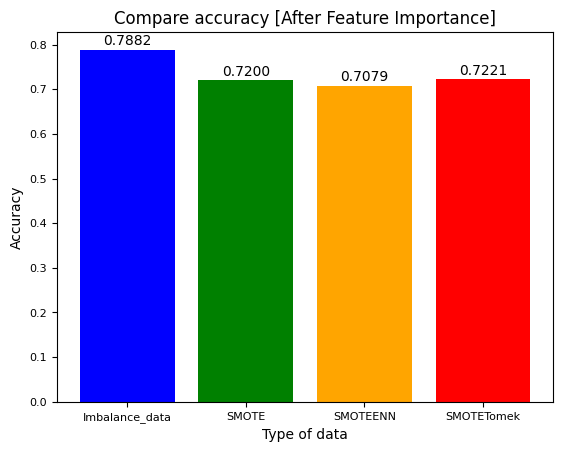

In [ ]:
type_of_data = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
acc = [accuracy_rf_imbalance_after,
         accuracy_rf_smote_after,
         accuracy_rf_smoteenn_after,
         accuracy_rf_smotetomek_after]

for index, data in enumerate(acc):
    plt.text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Reduce font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size of tick labels

bars = plt.bar(type_of_data, acc, color=['blue', 'green', 'orange', 'red'])  # Custom colors for each bar
# plt.bar(type_of_data, acc)
plt.title('Compare accuracy [After Feature Importance]')
plt.xlabel('Type of data')
plt.ylabel('Accuracy')
plt.show()

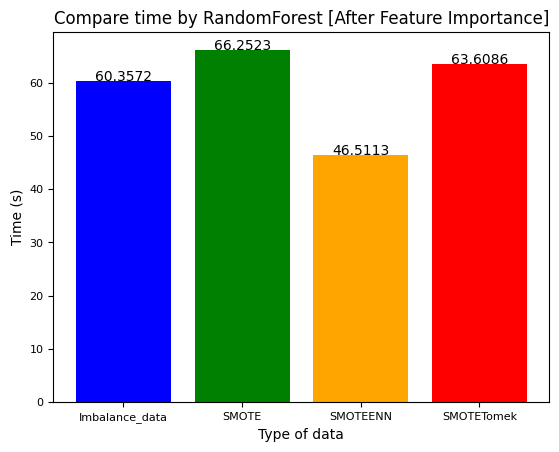

In [ ]:
type_of_data = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']
acc = [time_rf_imbalance_after,
         time_rf_smote_after,
         time_rf_smoteenn_after,
         time_rf_smotetomek_after]

for index, data in enumerate(acc):
    plt.text(x=index, y=data + 0.01, s=f"{data:.4f}", ha='center')

# Reduce font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size of tick labels

bars = plt.bar(type_of_data, acc, color=['blue', 'green', 'orange', 'red'])  # Custom colors for each bar
# plt.bar(type_of_data, acc)
plt.title('Compare time by RandomForest [After Feature Importance]')
plt.xlabel('Type of data')
# plt.ylabel('Time')
plt.ylabel('Time (s)')

plt.show()

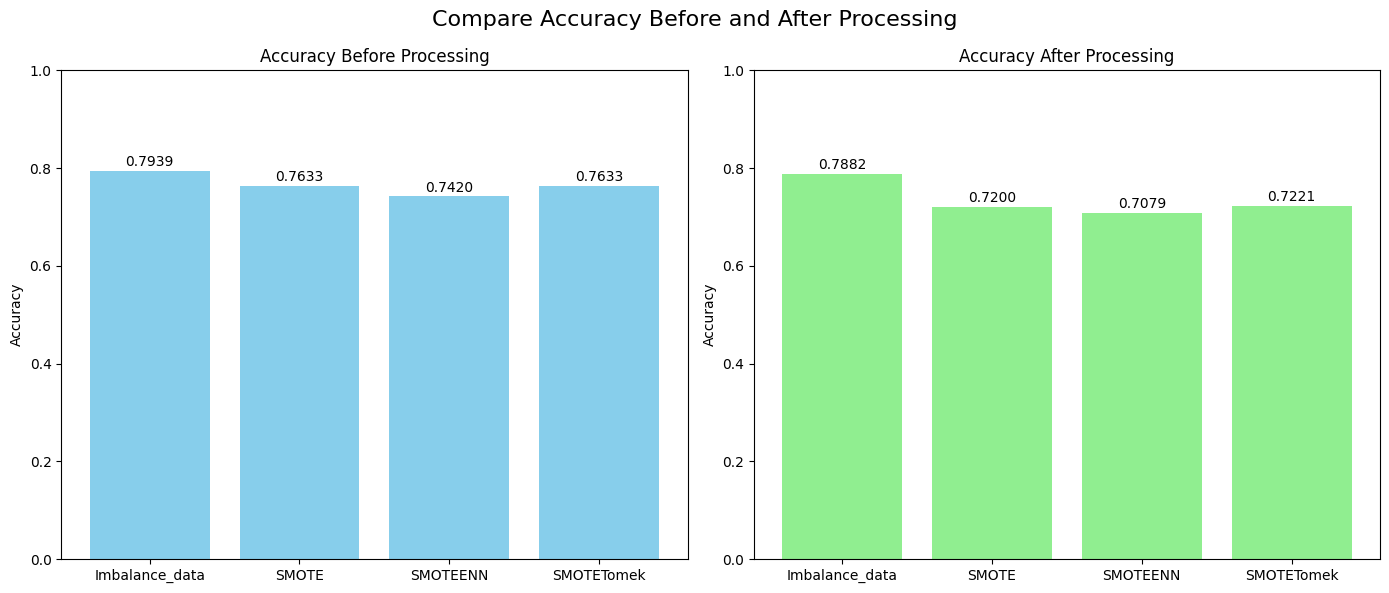

In [ ]:
# Accuracy values for the first graph (before processing)
accuracy_before = [accuracy_rf_imbalance_before,
         accuracy_rf_smote_before,
         accuracy_rf_smoteenn_before,
         accuracy_rf_smotetomek_before]
labels_before = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']

# Accuracy values for the second graph (after processing)
accuracy_after = [accuracy_rf_imbalance_after,
         accuracy_rf_smote_after,
         accuracy_rf_smoteenn_after,
         accuracy_rf_smotetomek_after]
labels_after = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']

# Create a figure with 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first bar chart (before)
ax[0].bar(labels_before, accuracy_before, color='skyblue')
ax[0].set_title('Accuracy Before Processing')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)  # Set y-axis to range from 0 to 1
for i, value in enumerate(accuracy_before):
    ax[0].text(i, value + 0.01, f"{value:.4f}", ha='center', fontsize=10)

# Plot the second bar chart (after)
ax[1].bar(labels_after, accuracy_after, color='lightgreen')
ax[1].set_title('Accuracy After Processing')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0, 1)  # Set y-axis to range from 0 to 1
for i, value in enumerate(accuracy_after):
    ax[1].text(i, value + 0.01, f"{value:.4f}", ha='center', fontsize=10)

# Add a common title for both subplots
fig.suptitle('Compare Accuracy Before and After Processing', fontsize=16)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

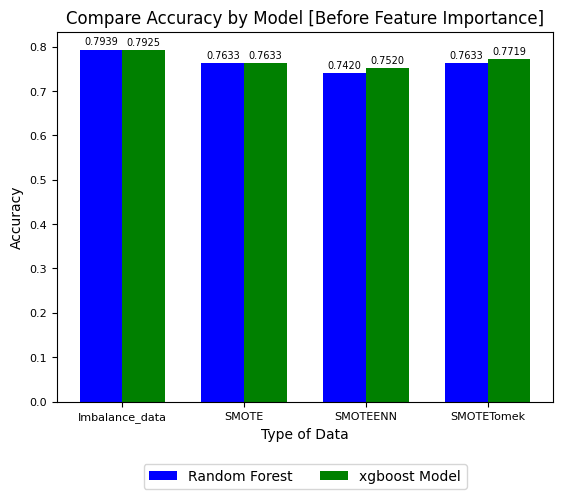

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data types and the results for each model
type_of_data = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']

# Accuracy results for each model: [RandomForest, OtherModel] for each data type
acc_rf = [accuracy_rf_imbalance_before, accuracy_rf_smote_before, accuracy_rf_smoteenn_before, accuracy_rf_smotetomek_before]
acc_xgboost_model = [accuracy_xgboost_imbalance_before, accuracy_xgboost_smote_before, accuracy_xgboost_smoteenn_before, accuracy_xgboost_smotetomek_before]

# Set width of bars
bar_width = 0.35

# Set positions for the bars
x = np.arange(len(type_of_data))

# Plotting the bars for the first model (RandomForest)
bars_rf = plt.bar(x - bar_width/2, acc_rf, bar_width, label='Random Forest', color='blue')

# Plotting the bars for the second model (xgboostModel)
bars_xgboost_model = plt.bar(x + bar_width/2, acc_xgboost_model, bar_width, label='xgboost Model', color='green')

# Add text annotations for each bar
for i, data in enumerate(acc_rf):
    plt.text(x=i - bar_width/2, y=data + 0.01, s=f"{data:.4f}", ha='center', fontsize=7)
for i, data in enumerate(acc_xgboost_model):
    plt.text(x=i + bar_width/2, y=data + 0.01, s=f"{data:.4f}", ha='center', fontsize=7)

# Reduce font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=8)

# Add title and labels
plt.title('Compare Accuracy by Model [Before Feature Importance]')
plt.xlabel('Type of Data')
plt.ylabel('Accuracy')

# Set x-ticks to match the data types
plt.xticks(x, type_of_data)

# Add a legend
# plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Show the plot
plt.show()


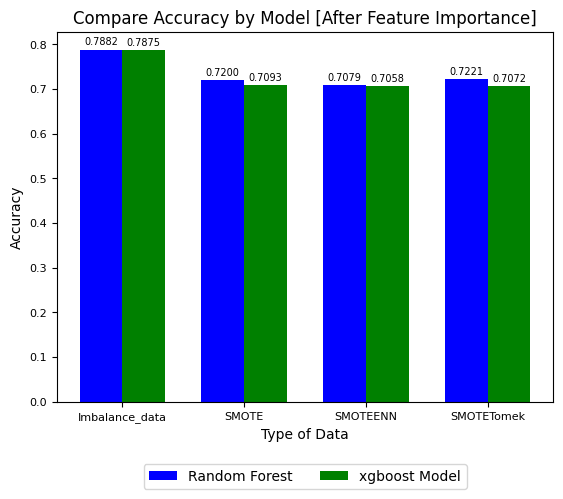

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data types and the results for each model
type_of_data = ['Imbalance_data', 'SMOTE', 'SMOTEENN', 'SMOTETomek']

# Accuracy results for each model: [RandomForest, OtherModel] for each data type
acc_rf = [accuracy_rf_imbalance_after, accuracy_rf_smote_after, accuracy_rf_smoteenn_after, accuracy_rf_smotetomek_after]
acc_xgboost_model = [accuracy_xgboost_imbalance_after, accuracy_xgboost_smote_after, accuracy_xgboost_smoteenn_after, accuracy_xgboost_smotetomek_after]

# Set width of bars
bar_width = 0.35

# Set positions for the bars
x = np.arange(len(type_of_data))

# Plotting the bars for the first model (RandomForest)
bars_rf = plt.bar(x - bar_width/2, acc_rf, bar_width, label='Random Forest', color='blue')

# Plotting the bars for the second model (xgboostModel)
bars_xgboost_model = plt.bar(x + bar_width/2, acc_xgboost_model, bar_width, label='xgboost Model', color='green')

# Add text annotations for each bar
for i, data in enumerate(acc_rf):
    plt.text(x=i - bar_width/2, y=data + 0.01, s=f"{data:.4f}", ha='center', fontsize=7)
for i, data in enumerate(acc_xgboost_model):
    plt.text(x=i + bar_width/2, y=data + 0.01, s=f"{data:.4f}", ha='center', fontsize=7)

# Reduce font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=8)

# Add title and labels
plt.title('Compare Accuracy by Model [After Feature Importance]')
plt.xlabel('Type of Data')
plt.ylabel('Accuracy')

# Set x-ticks to match the data types
plt.xticks(x, type_of_data)

# Add a legend
# plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Show the plot
plt.show()
